Lifelong data from paper: https://www.nature.com/articles/s41467-021-27594-w#data-availability

In [1]:
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath("../../src/utils"))
from preprocess import * 
from plotting import *


In [2]:
atac_cells_to_psd = merge_cluster_metadata('atac', 'peak_region_fragments')
# rename cell to atac_cell
atac_cells_to_psd.rename(columns={'cell': 'atac_cell'}, inplace=True)
atac_cells_to_psd

,atac_cell,peak_region_fragments,stage_dpf,annotation,pseudobulk
0,AAACGAAAGGATATCA-1,3714,1.5,cycling cells,1.5_cycling cells
1,AAACGAAAGTTCCCGG-1,8365,1.5,cycling cells,1.5_cycling cells
2,AAACGAAAGTTTACGC-1,4322,1.5,cycling cells,1.5_cycling cells
3,AAACGAACAATGACTC-1,9818,1.5,cycling cells,1.5_cycling cells
4,AAACGAATCGGTTAGT-1,7185,1.5,cycling cells,1.5_cycling cells
...,...,...,...,...,...
36736,TTTGTGTGTGTTAGAA-1,4113,210.0,gill progenitor 1,210_gill progenitor 1
36737,TTTGTGTTCAATCGTG-1,2713,210.0,stroma 1,210_stroma 1
36738,TTTGTGTTCTCATATC-1,3648,210.0,perivascular,210_perivascular
36739,TTTGTGTTCTTCTCTC-1,6777,210.0,teeth,210_teeth


/sasselab3/home/mourouzidou/zebrafish_development/src/utils/plotting.py:617: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=6, linespacing=1.7)


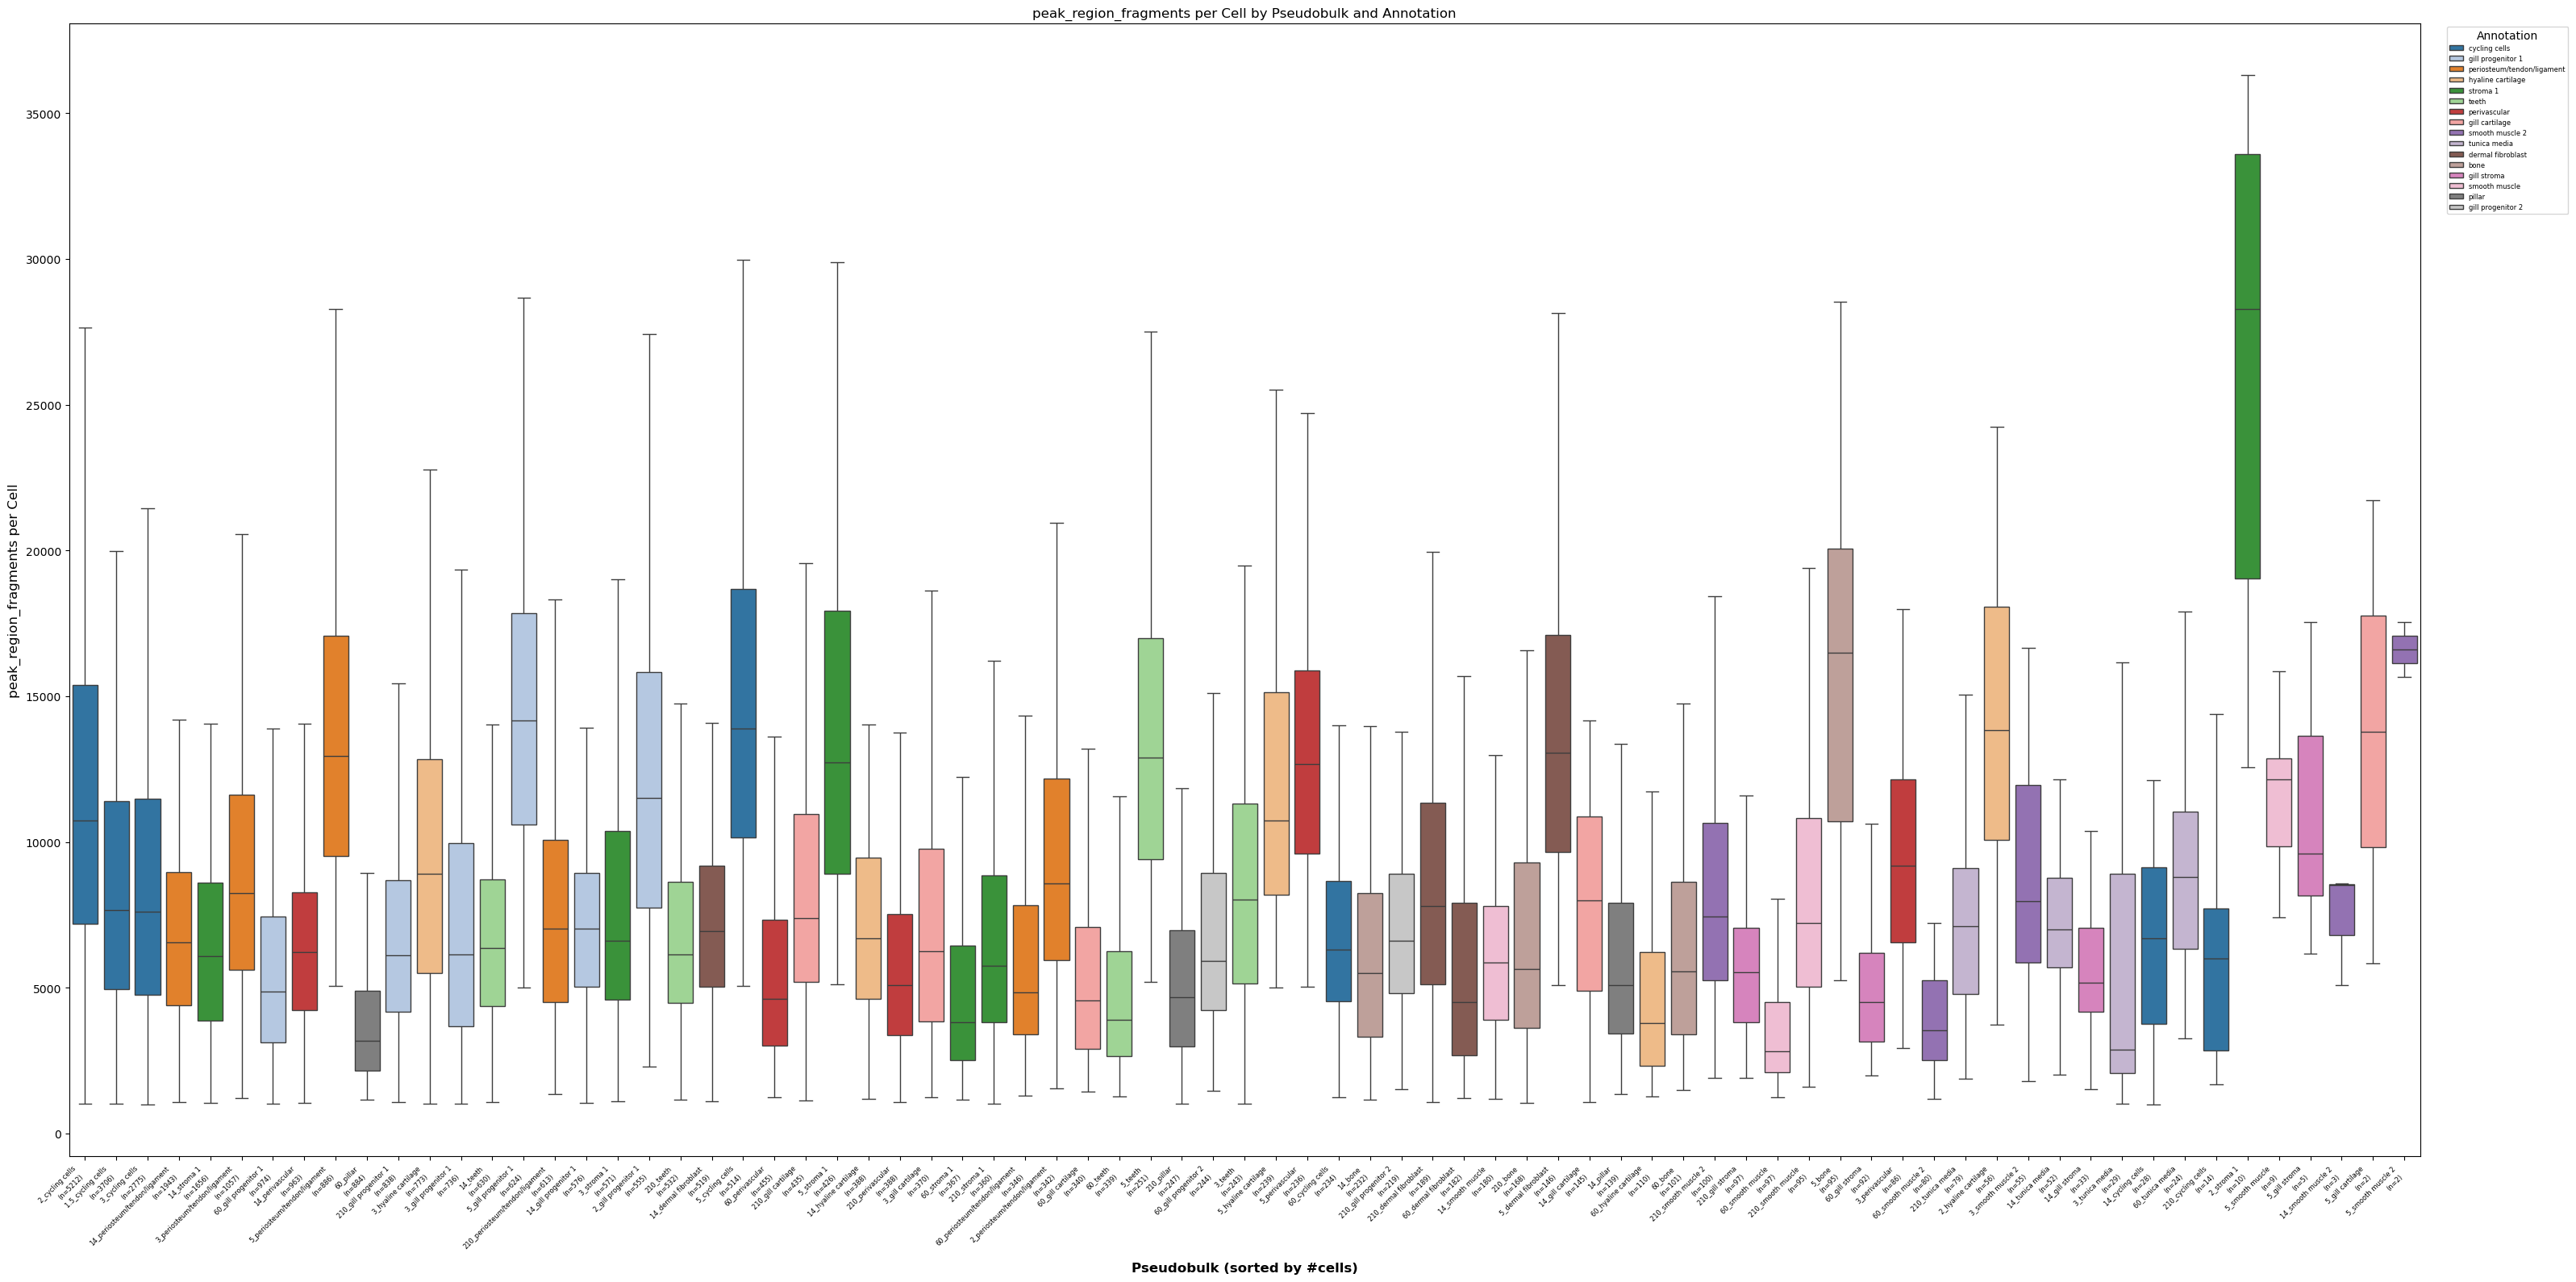

In [28]:
plot_pseudobulk_distributions(atac_cells_to_psd, count_col = 'peak_region_fragments', max_pseudobulks = None)

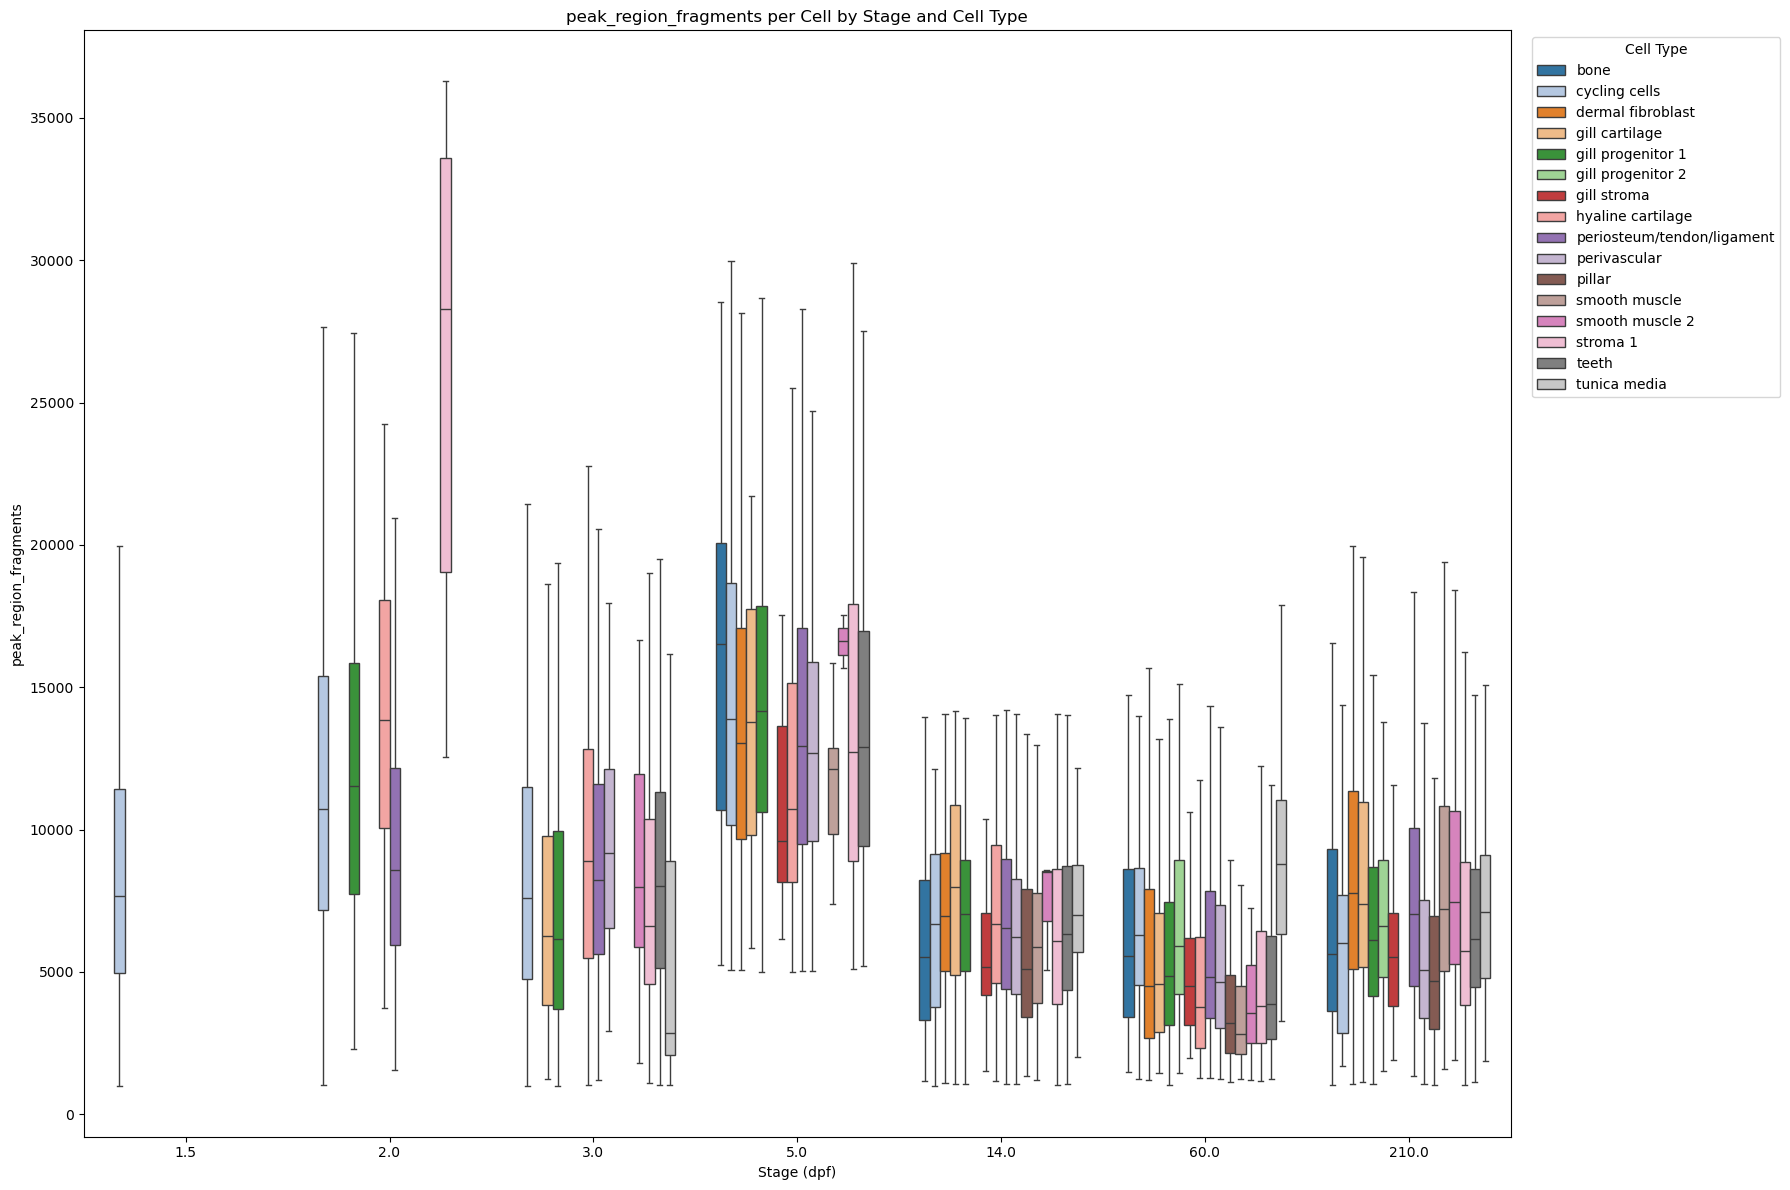

In [30]:
plot_reads_per_cell_by_celltype_and_stage(atac_cells_to_psd, count_col='peak_region_fragments', min_cells_per_group=0, group_by='stage')

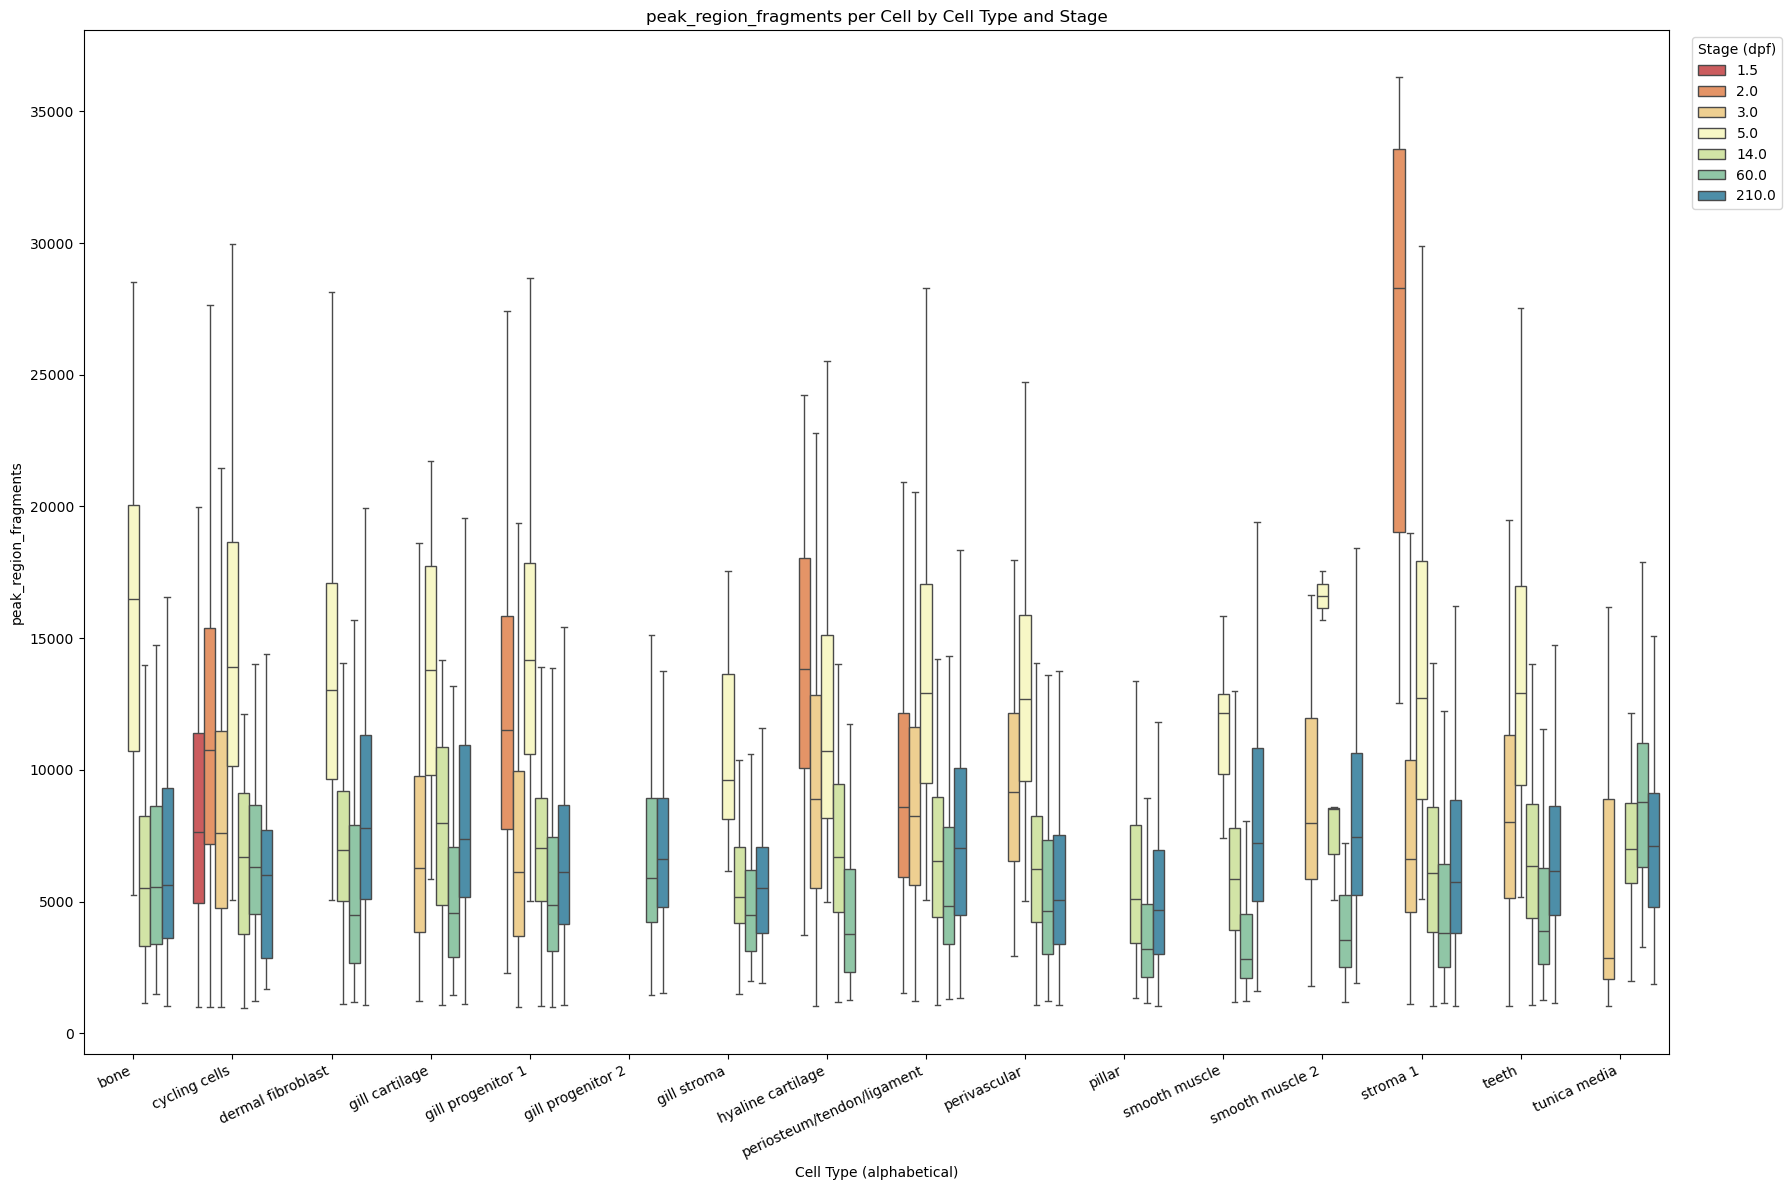

In [31]:
plot_reads_per_cell_by_celltype_and_stage(atac_cells_to_psd, count_col='peak_region_fragments', min_cells_per_group=0)

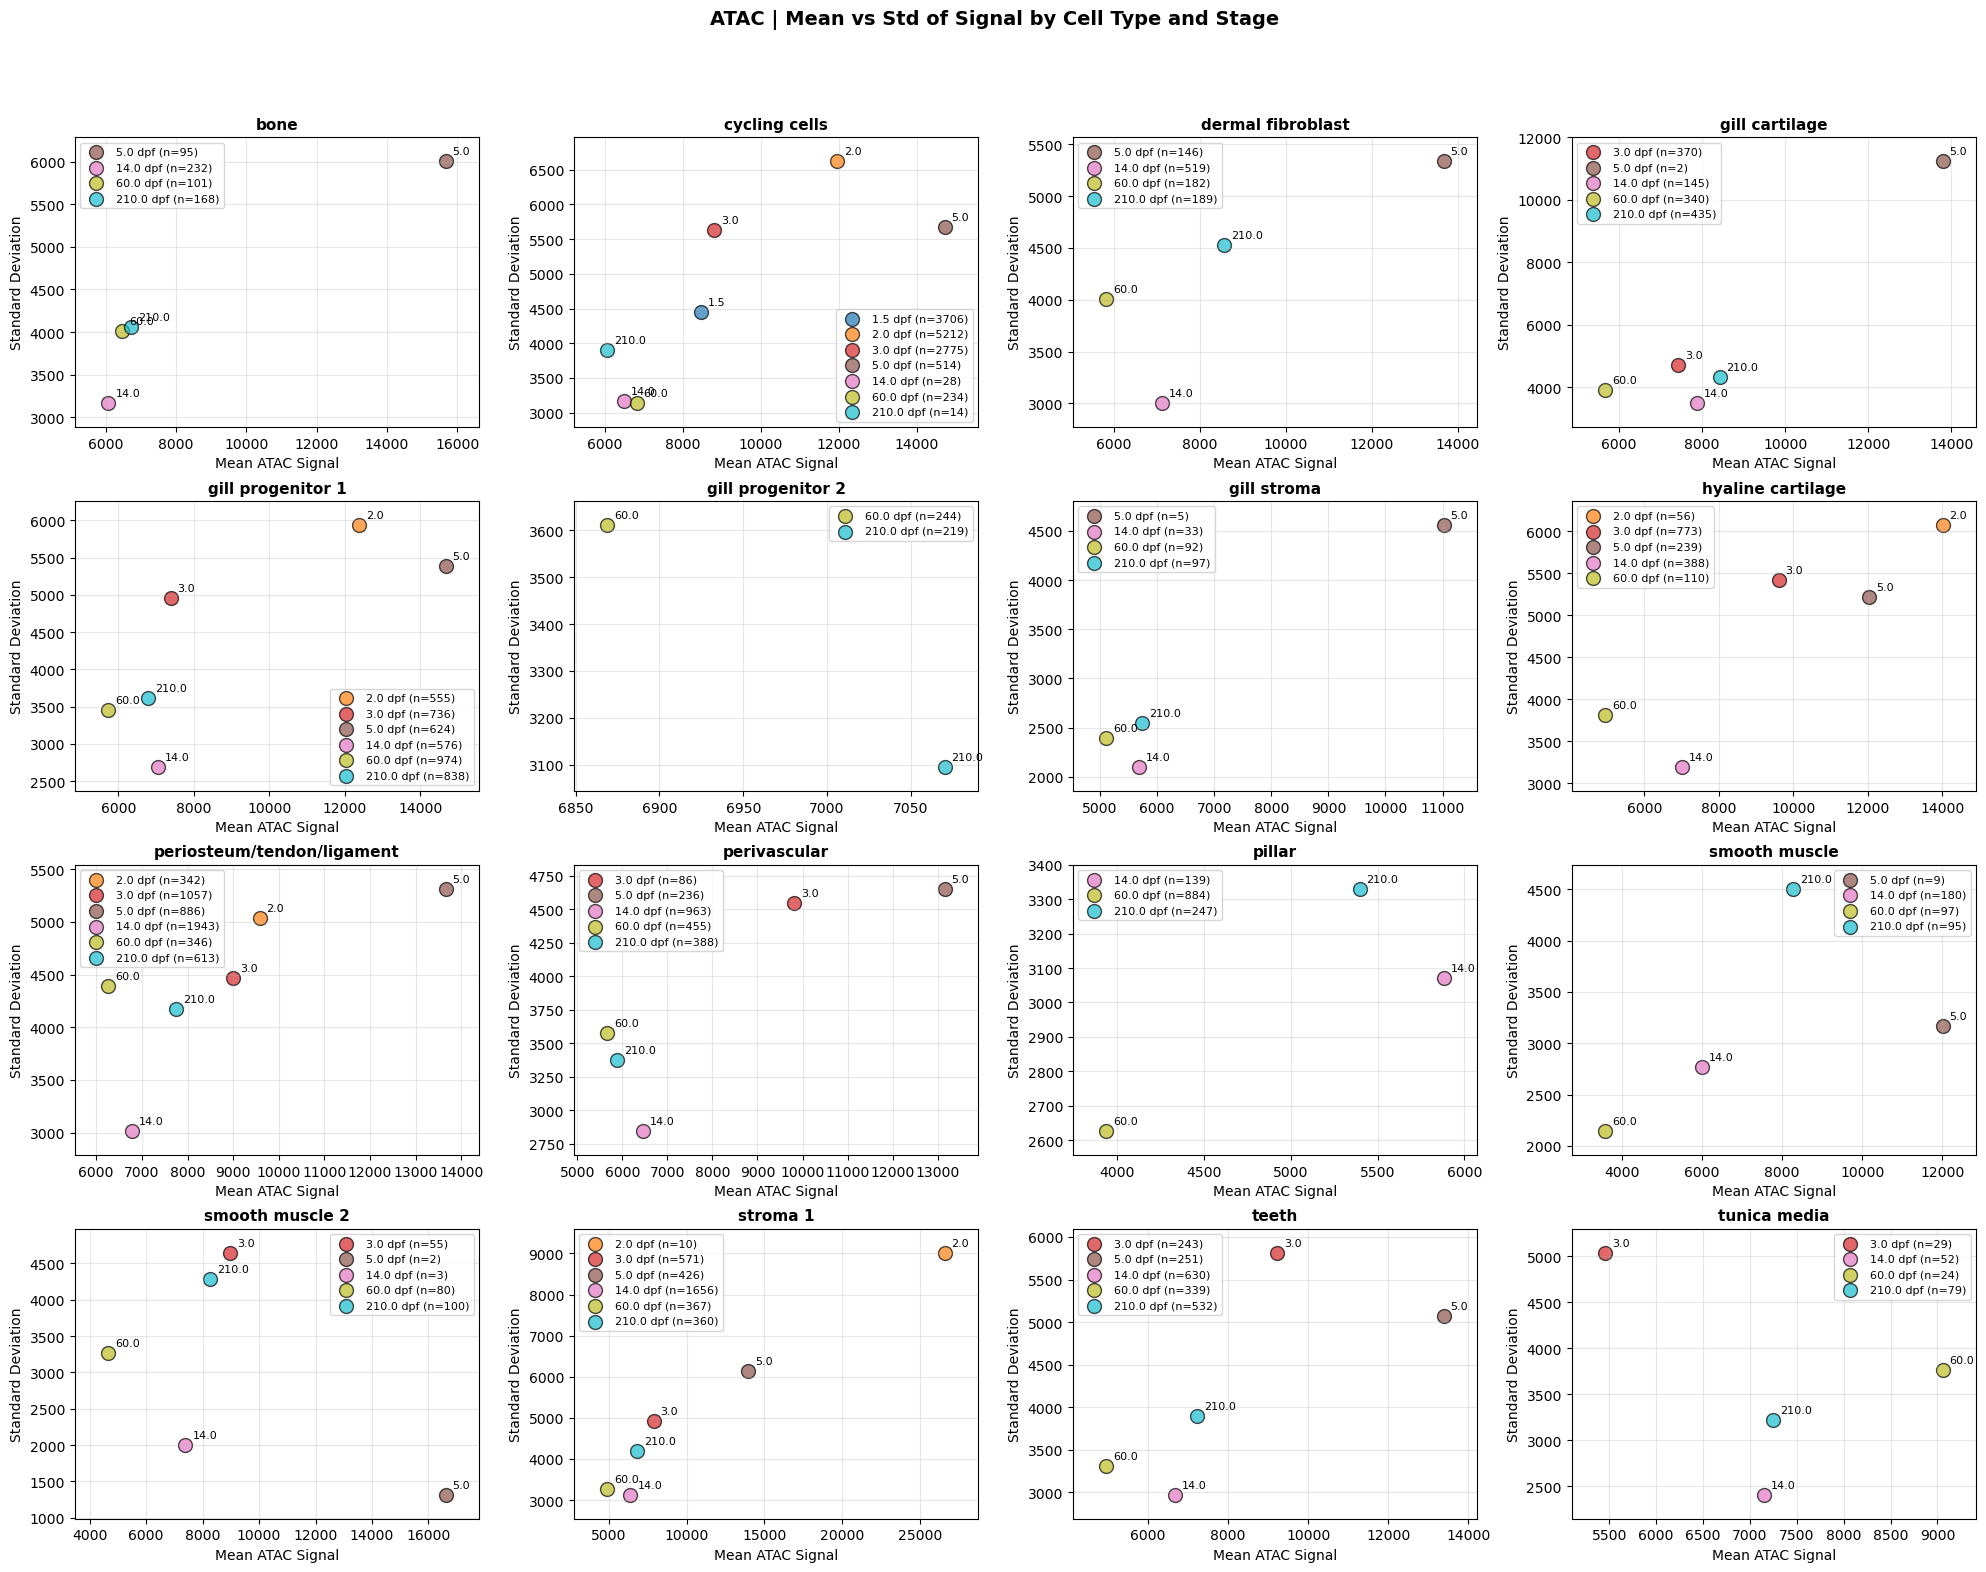

In [65]:
plot_mean_vs_std_by_celltype_and_stage(
    df=atac_cells_to_psd, 
    signal_col='peak_region_fragments', 
    modality_label='ATAC'
)


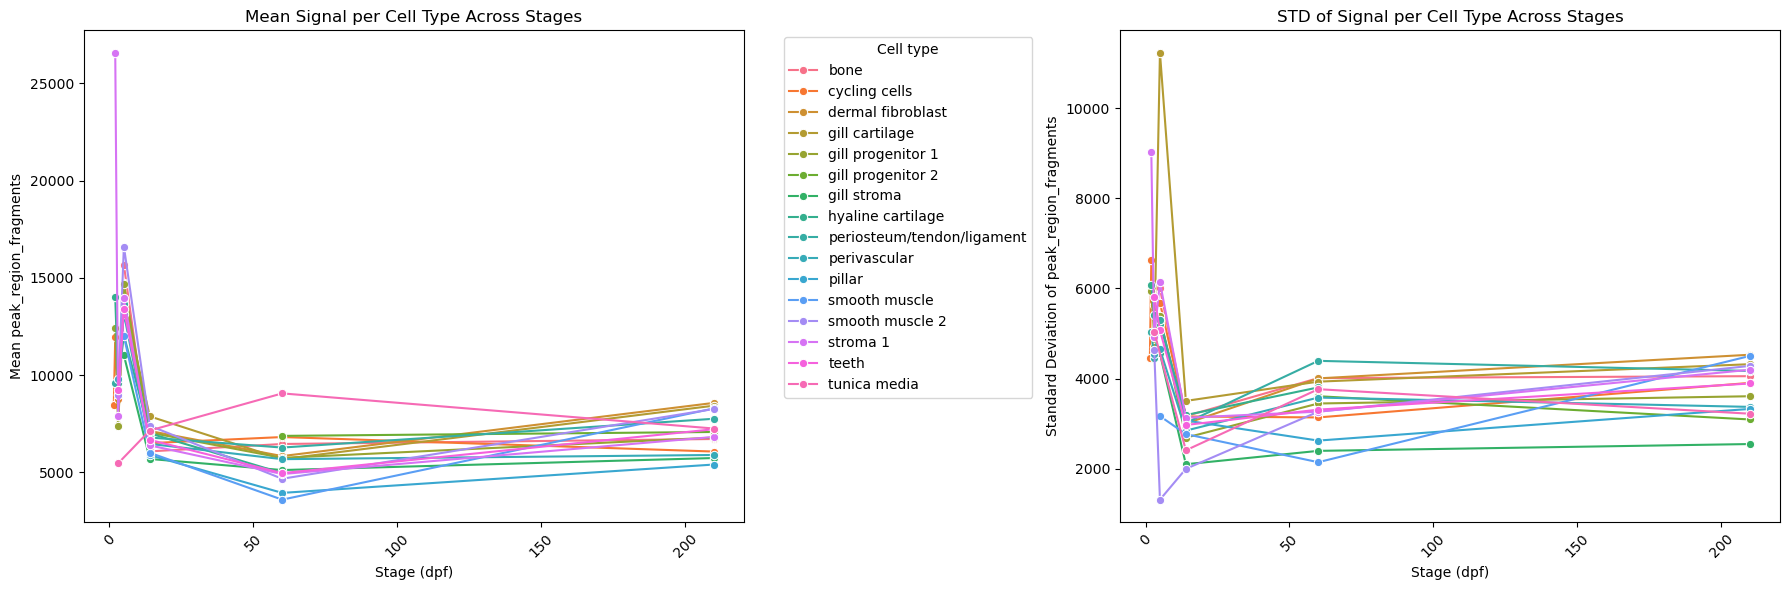

In [59]:

lineplot_mean_std_by_stage(atac_cells_to_psd)



_____________________________
### RNA

In [7]:
rna_cells_to_psd = merge_cluster_metadata('rna', 'nCount_RNA')
rna_cells_to_psd


,cell,nCount_RNA,stage_dpf,annotation,pseudobulk
0,Sox10BtR_36hpf-1_020618_AAACCTGGTTCACCTC-1,6103,1.5,cycling cells,1.5_cycling cells
1,Sox10BtR_36hpf-1_020618_AAACGGGGTAACGTTC-1,6839,1.5,cycling cells,1.5_cycling cells
2,Sox10BtR_36hpf-1_020618_AAACGGGGTACTCAAC-1,7758,1.5,cycling cells,1.5_cycling cells
3,Sox10BtR_36hpf-1_020618_AAACGGGGTATAGGGC-1,8253,1.5,cycling cells,1.5_cycling cells
4,Sox10BtR_36hpf-1_020618_AAACGGGGTCAAAGAT-1,1658,1.5,cycling cells,1.5_cycling cells
...,...,...,...,...,...
46156,3_TTTGTCACAATAACGA-1,6016,150.0,gill cartilage,150_gill cartilage
46157,3_TTTGTCAGTCTCCACT-1,2241,150.0,periosteum/tendon/ligament,150_periosteum/tendon/ligament
46158,3_TTTGTCATCAAAGACA-1,6582,150.0,gill cartilage,150_gill cartilage
46159,3_TTTGTCATCAACACCA-1,1300,150.0,teeth,150_teeth


In [44]:
#print rna unique annotations
r = rna_cells_to_psd['annotation'].unique()
a = atac_cells_to_psd['annotation'].unique()
print("RNA unique annotations not in ATAC:", set(r) - set(a))


RNA unique annotations not in ATAC: {'stroma 2'}


/sasselab3/home/mourouzidou/zebrafish_development/src/utils/plotting.py:617: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=6, linespacing=1.7)


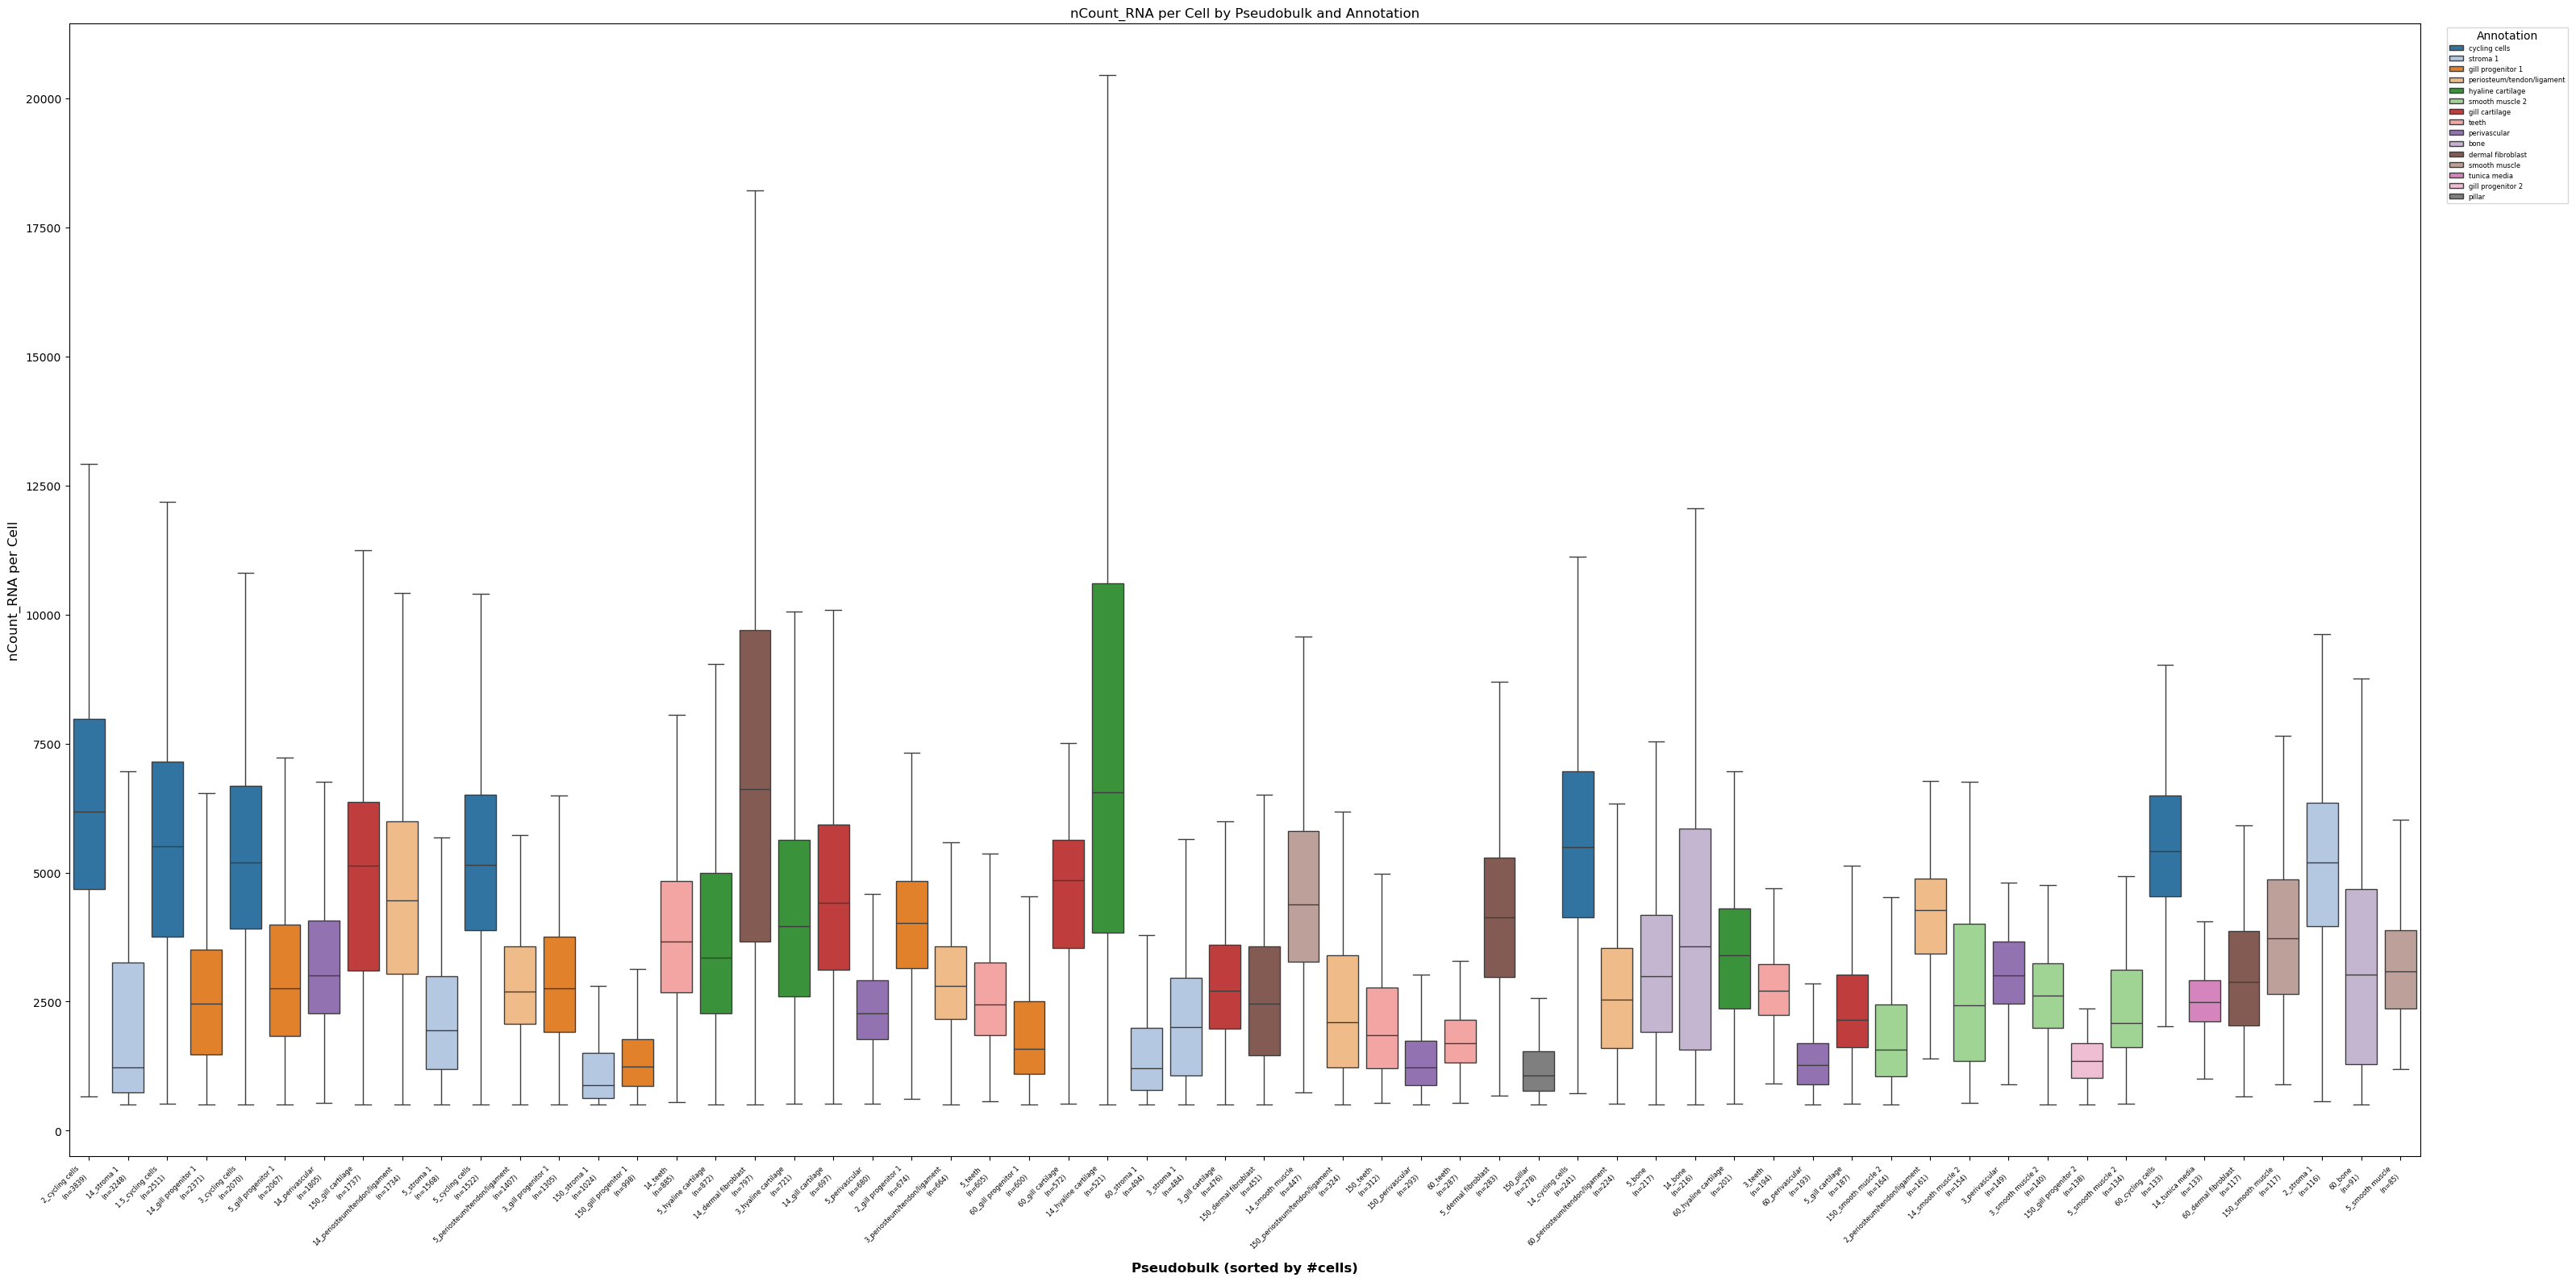

In [33]:
plot_pseudobulk_distributions(rna_cells_to_psd, count_col = 'nCount_RNA', max_pseudobulks=60)

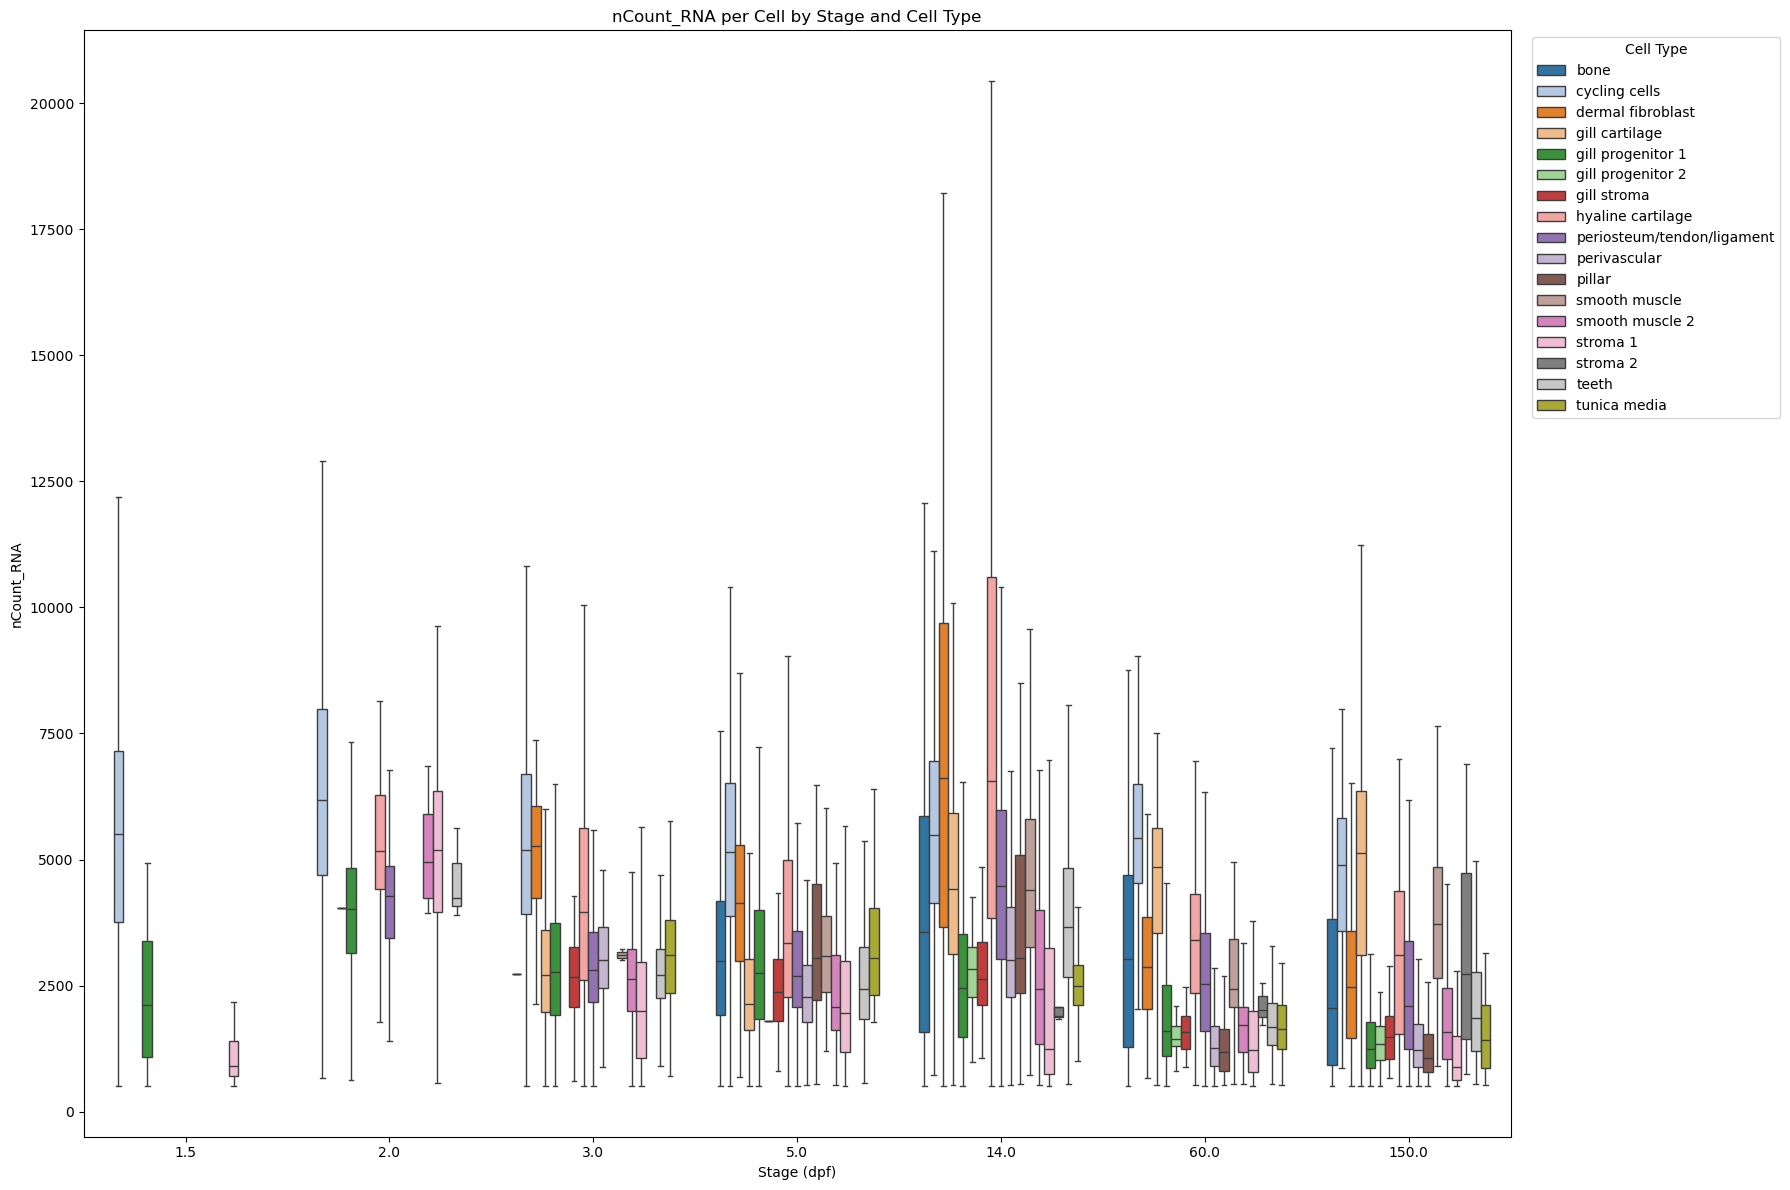

In [34]:
plot_reads_per_cell_by_celltype_and_stage(rna_cells_to_psd, count_col='nCount_RNA', min_cells_per_group=0, group_by='stage')

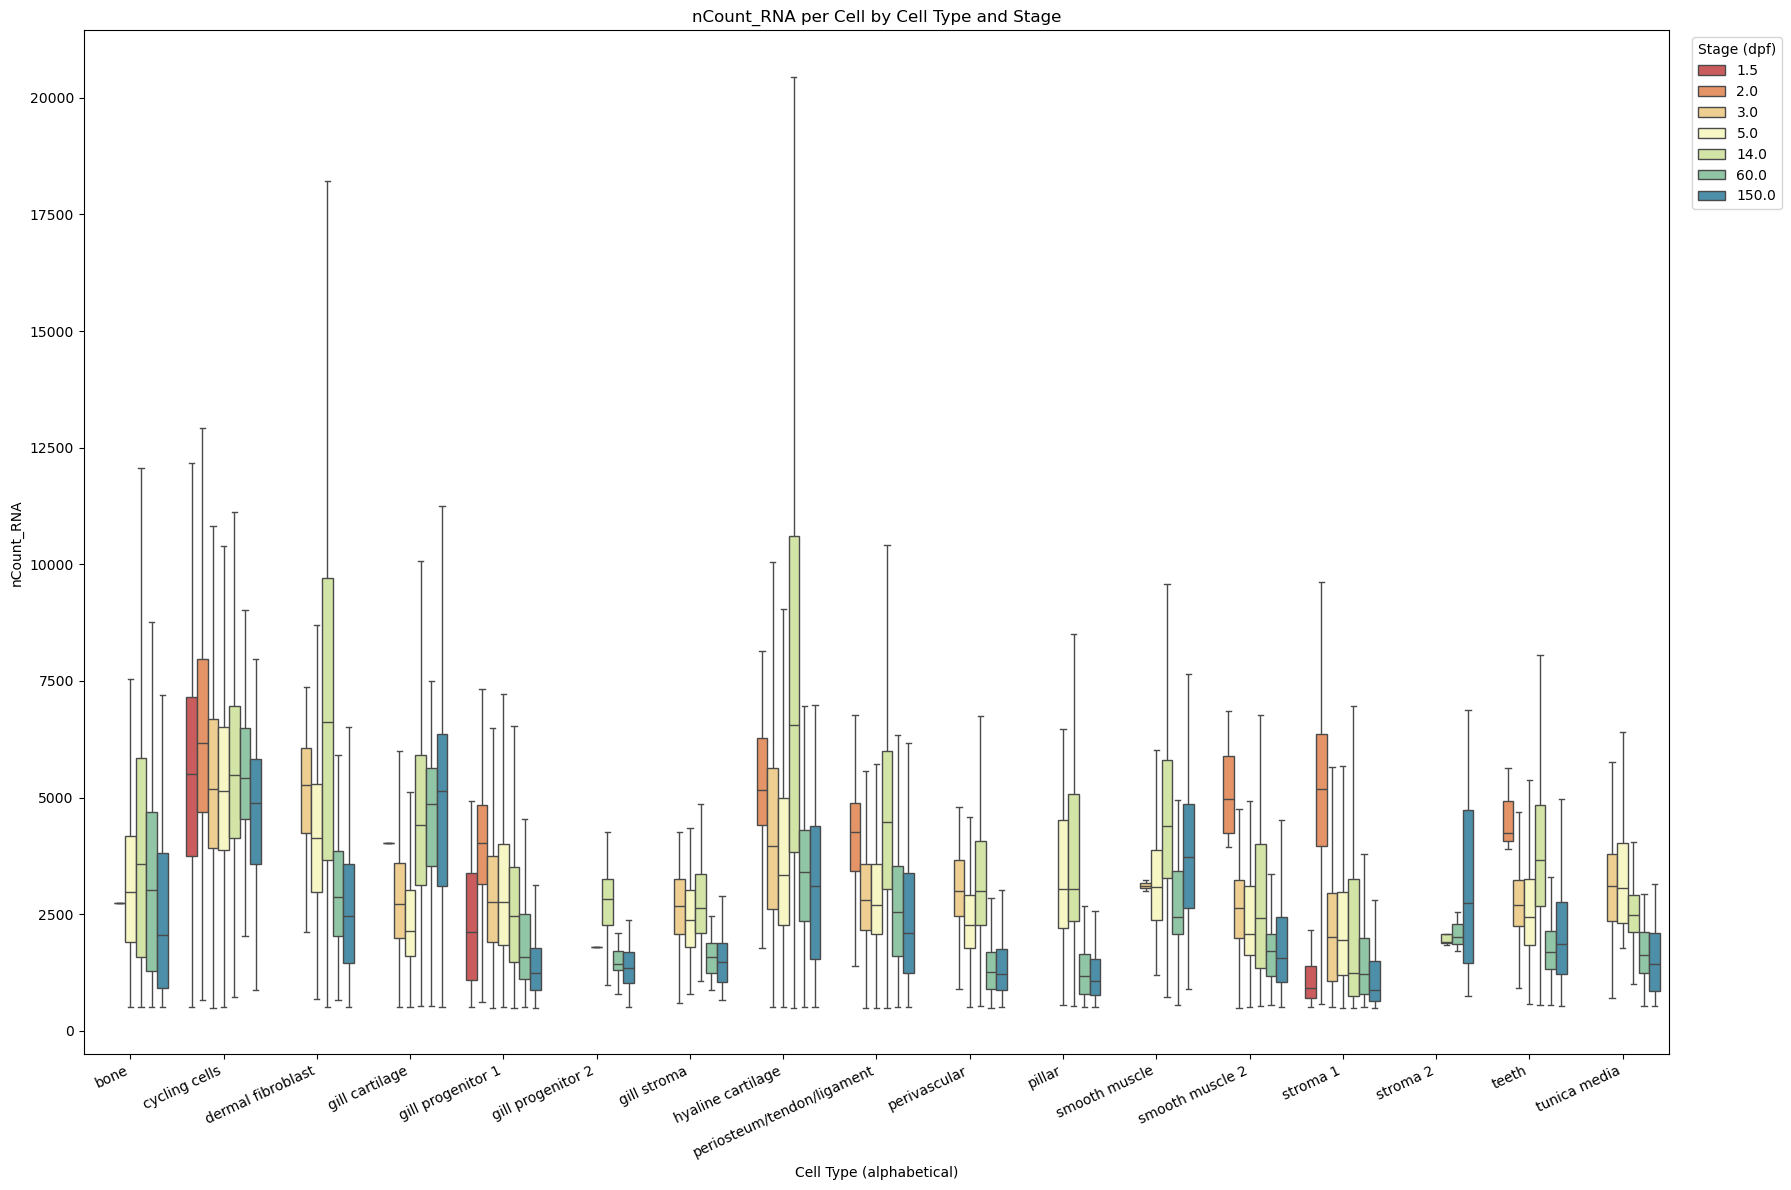

In [35]:
plot_reads_per_cell_by_celltype_and_stage(rna_cells_to_psd, count_col='nCount_RNA', min_cells_per_group=0)

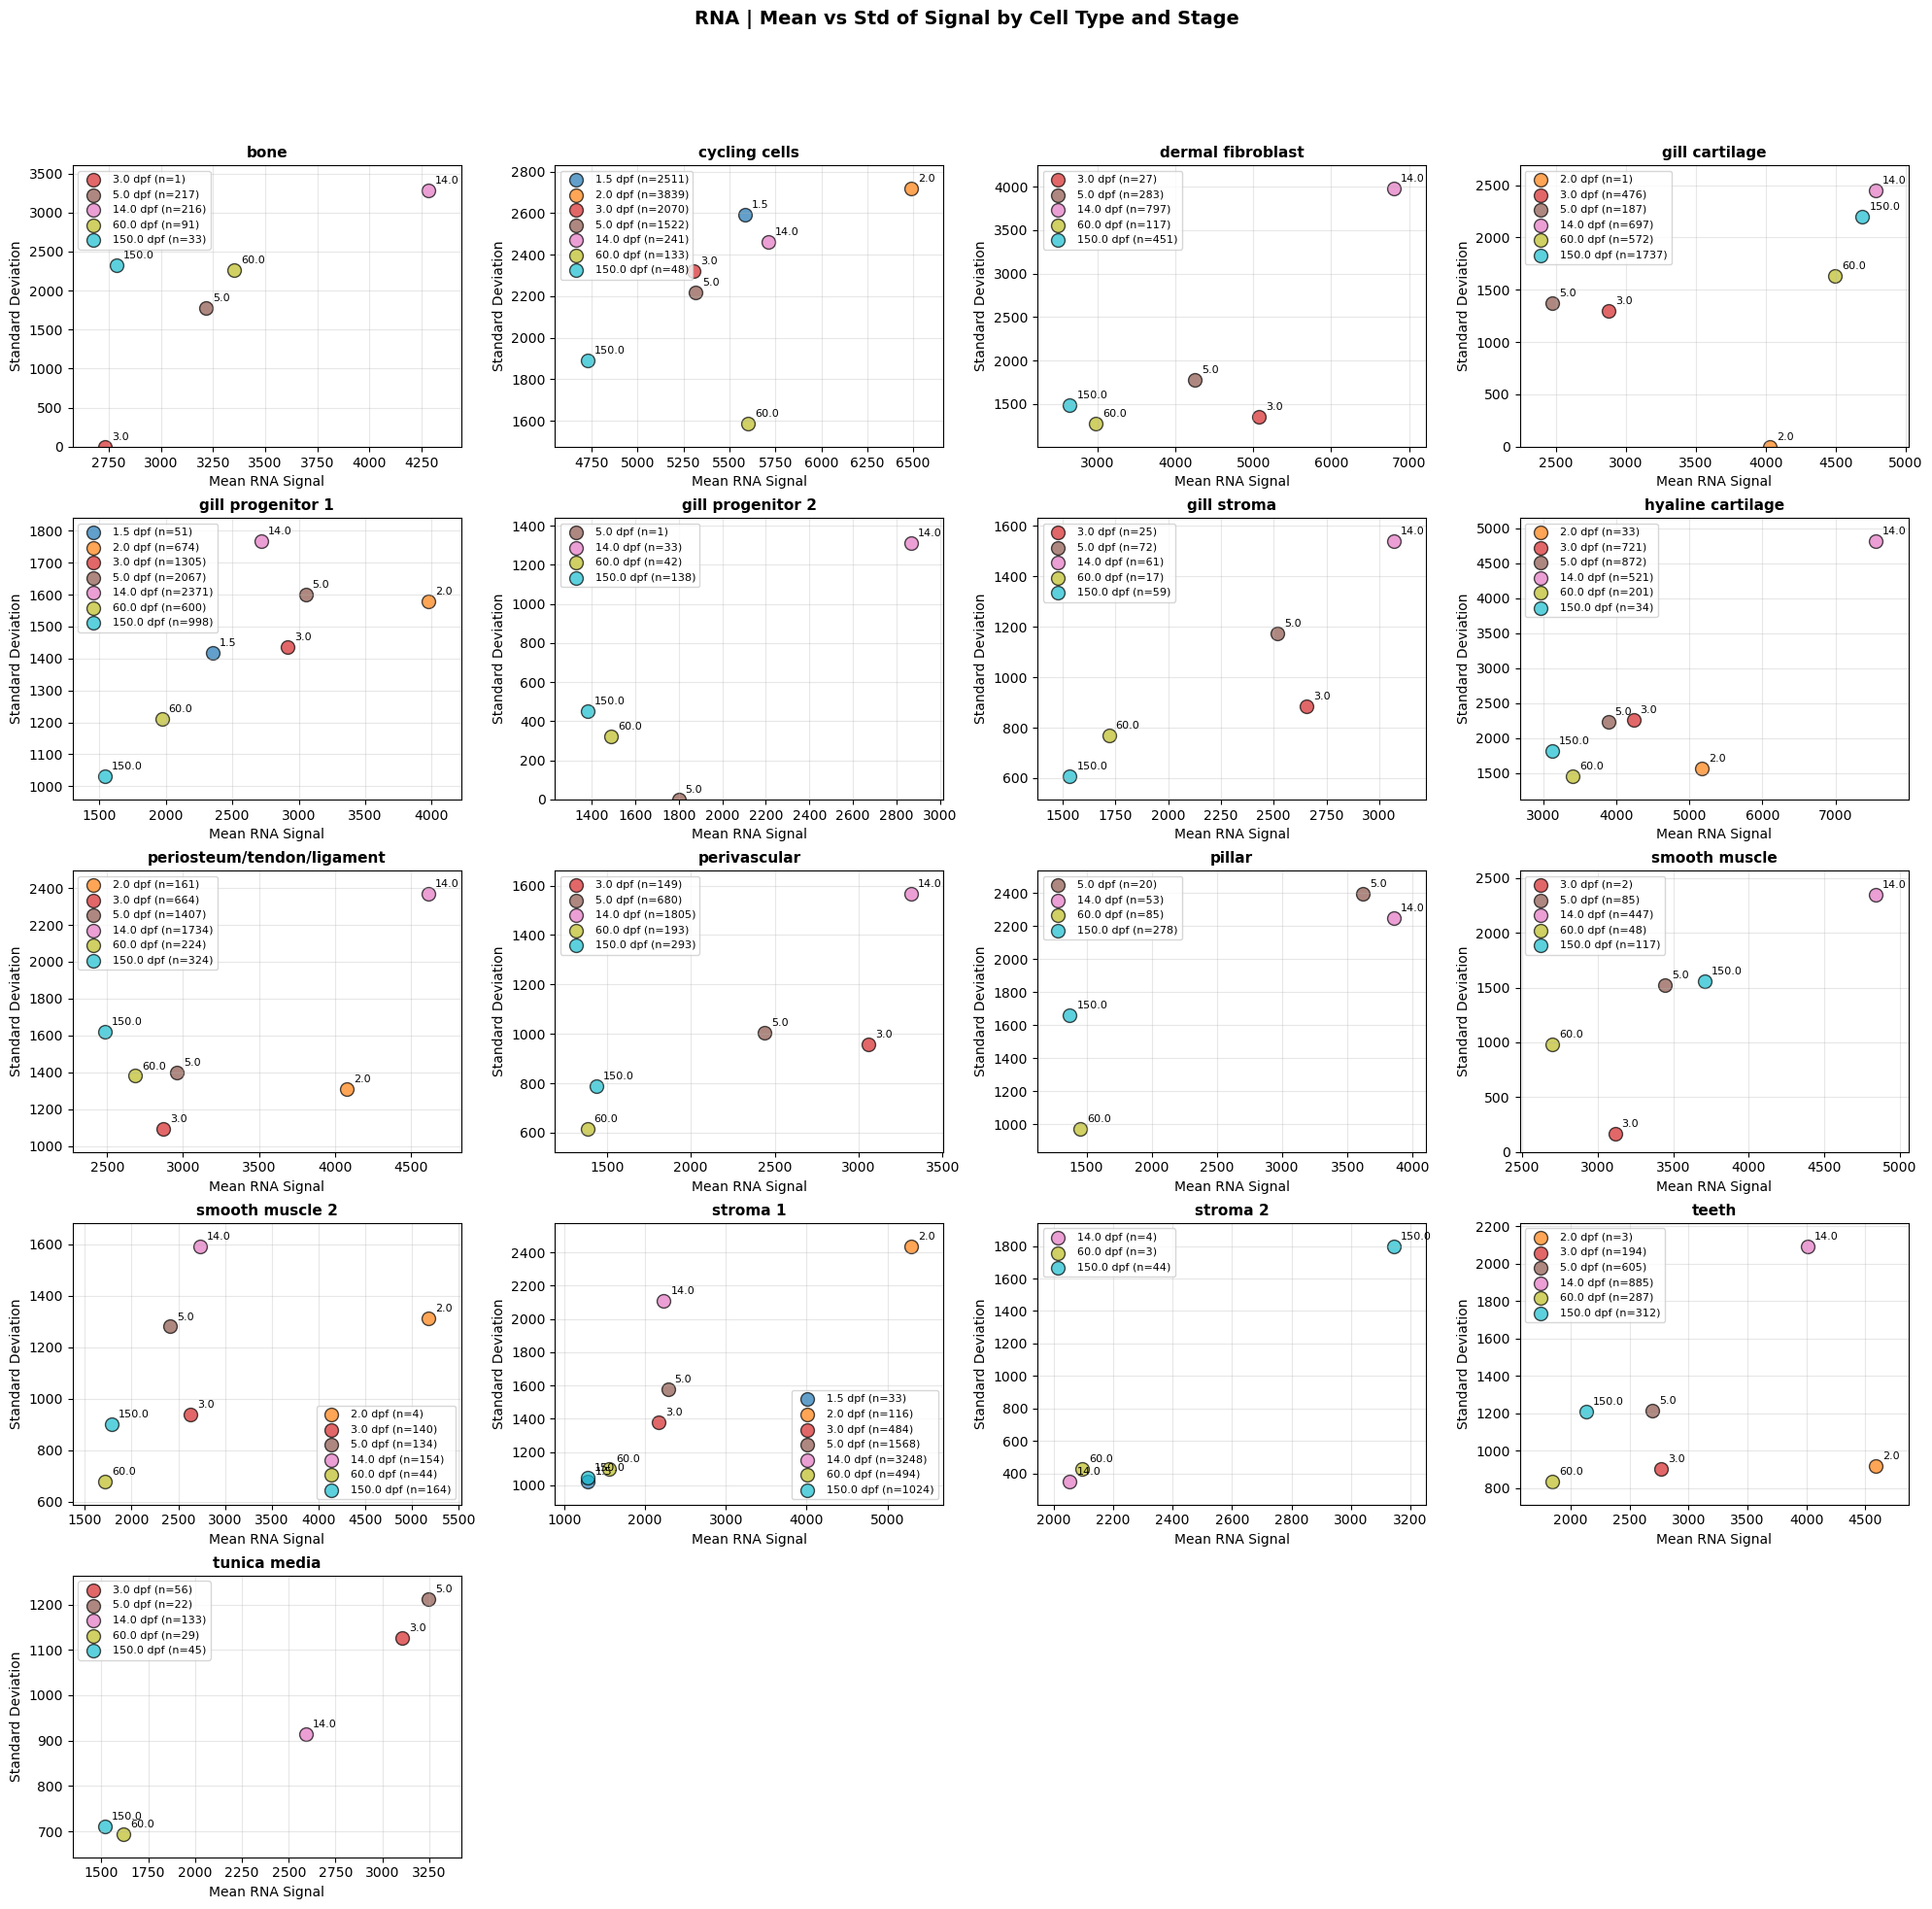

In [64]:
plot_mean_vs_std_by_celltype_and_stage(
    df=rna_cells_to_psd, 
    signal_col='nCount_RNA', 
    modality_label='RNA'
)


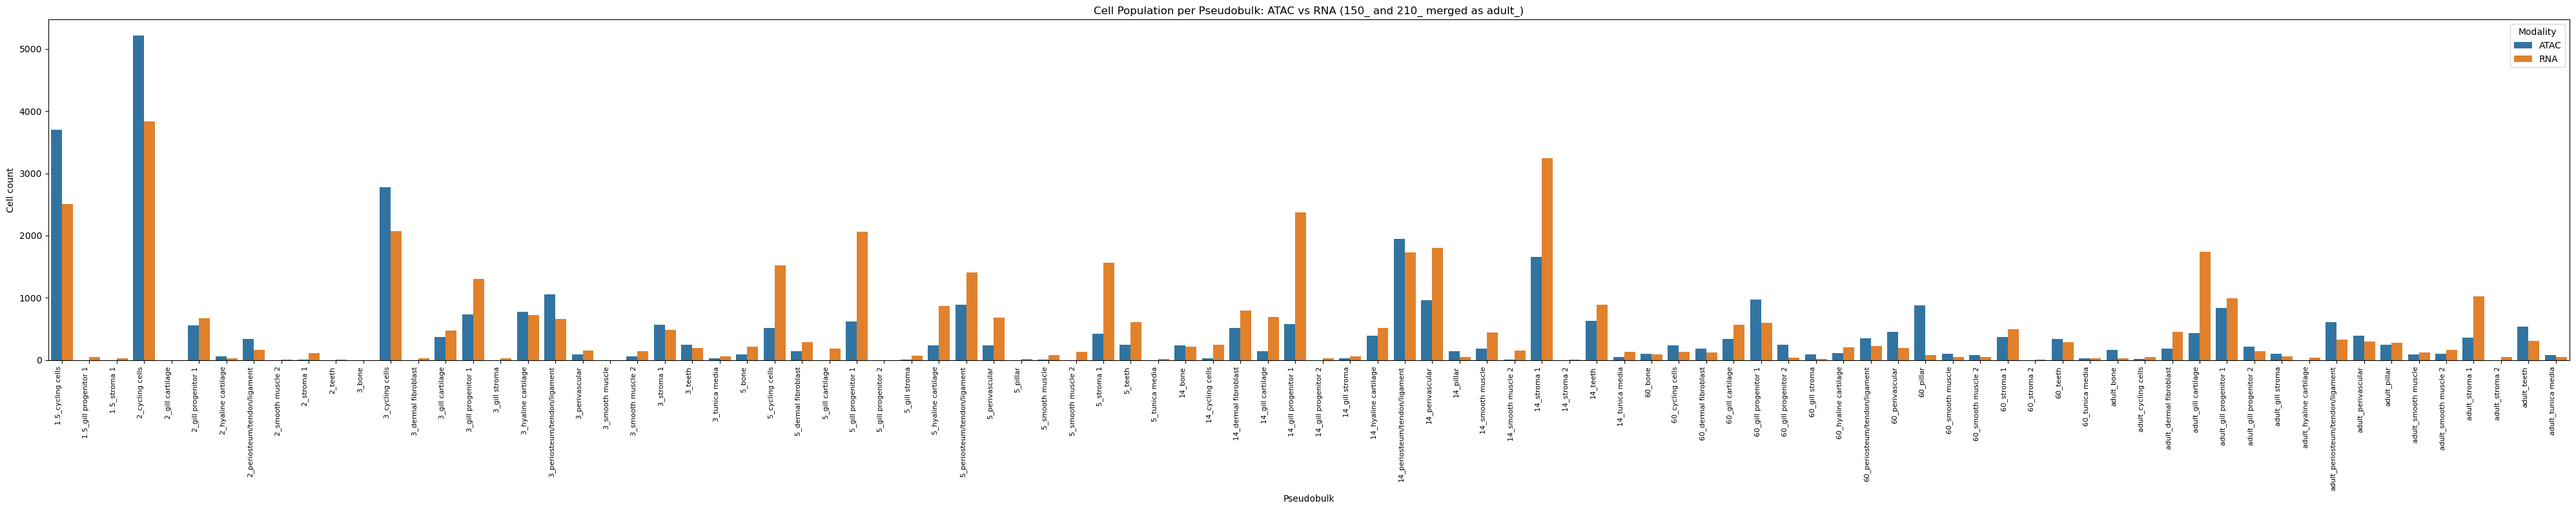

In [43]:
plot_pseudobulk_cell_counts(atac_cells_to_psd, rna_cells_to_psd)

In [115]:
# rename 150 dpf in stage_dpf of rna_cells_to_psd to 210 
rna_cells_to_psd_210 = rna_cells_to_psd.copy()
rna_cells_to_psd_210['stage_dpf'] = rna_cells_to_psd['stage_dpf'].replace({150: 210})

In [116]:
atac_mean_df = atac_cells_to_psd.groupby(['annotation', 'stage_dpf'])['peak_region_fragments'].mean().reset_index()
rna_mean_df = rna_cells_to_psd_210.groupby(['annotation', 'stage_dpf'])['nCount_RNA'].mean().reset_index()

atac_mean_df.columns = ['cell_type', 'stage_dpf', 'mean_atac']
rna_mean_df.columns = ['cell_type', 'stage_dpf', 'mean_rna']

merged_df = pd.merge(atac_mean_df, rna_mean_df, on=['cell_type', 'stage_dpf'], how='inner')


In [118]:
merged_df

,cell_type,stage_dpf,mean_atac,mean_rna
0,bone,5.0,15667.463158,3214.718894
1,bone,14.0,6072.504310,4283.981481
2,bone,60.0,6452.138614,3351.384615
3,bone,210.0,6708.809524,2788.666667
4,cycling cells,1.5,8452.862115,5582.968538
...,...,...,...,...
70,teeth,210.0,7211.505639,2129.480769
71,tunica media,3.0,5457.655172,3104.089286
72,tunica media,14.0,7144.961538,2592.466165
73,tunica media,60.0,9054.666667,1619.517241


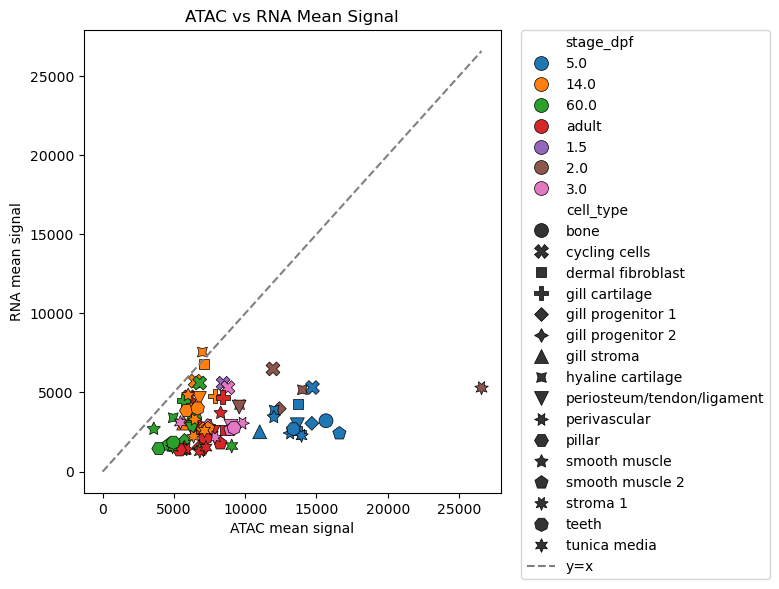

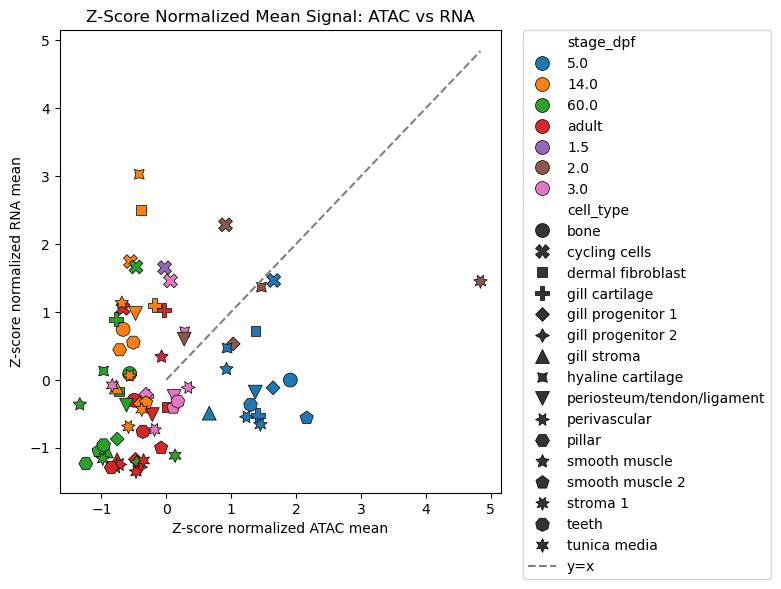

In [ ]:
from scipy.stats import zscore

# Z-score normalize the means
merged_df['z_mean_atac'] = zscore(merged_df['mean_atac'])
merged_df['z_mean_rna'] = zscore(merged_df['mean_rna'])


plot_mean_vs_mean(
    df=merged_df,
    x_col='mean_atac',
    y_col='mean_rna',
    x_label='ATAC mean signal',
    y_label='RNA mean signal',
    title='ATAC vs RNA Mean Signal',
    hue='stage_dpf',
    style='cell_type',
    figsize=(8, 6)
)
plot_mean_vs_mean(
    merged_df,
    x_col='z_mean_atac',
    y_col='z_mean_rna',
    x_label='Z-score normalized ATAC mean',
    y_label='Z-score normalized RNA mean',
    title='Z-Score Normalized Mean Signal: ATAC vs RNA'
)

